# Twitter Sentiment Analysis Project

In [1]:
#Import the necessary methods from tweepy library as well as json and time
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import json

import time
import pandas as pd
import csv
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk

## Authentication

In [2]:
consumer_key = 'VdT4ZF9obJyY8M42CITeivjph'
consumer_secret = 'ljVJtutgZJWXSueMIQE0XKeMhX2a0I9FYILC3Zu9AMPMvxCTbx'
access_token = '1259514994946949120-E8Cn1cbiR1sH564whOvPSG4PiYWIWY'
access_secret = 'vI4y7MMFmF3nj8Mc0dJiNEpS8NPwjTkzg4Q23tGvDQSms'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## Fetching Tweets

In [3]:
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))
# posts = api.user_timeline(screen_name=searchTerm, count = NoOfTerms, lang ="en", page=2, tweet_mode="extended")
# tweets=api.user_timeline(screen_name="bill gates", count=100, lang="en", tweet_mode="extended")

tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)

Enter Keyword/Tag to search about: Corona Virus
Enter how many tweets to search: 1600


In [4]:
l=[]
c=0
j=1
for i in tweets:
    if(c<5):
        print(str(j)+')'+'  '+i.text)
        c=c+1
        j=j+1
    else:
        break;

1)  RT @GeorgiaLogCabin: #Poll: Do you think you will catch the Wuhan corona virus before the end of the year? Vote &amp; retweet!
#coronavirus #co…
2)  RT @Artii_M: A small doccie about my journey with Corona virus airs tonight from around 17h30... on Newzroom Afrika.
3)  RT @khot_saeed: @deepakwagh85 @smritiirani @rsprasad @OfficeOfRSP @vaastavngo @narendramodi @sharmarekha @unwomenindia @unwomenasia @Minist…
4)  RT @satnam81556668: @UnSubtleDesi Congress more dangerous than corona virus for India 🇮🇳....believe me or not but it’s a true.
5)  RT @coolfunnytshirt: Kejriwal is 4 steps ahead of Corona Virus 

Step 1: Blame Modi 
Step 2: Blame Center 
Step 3: Blame Everybody 
Step 4:…


## Creating Dataframe

In [5]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.text for tweet in tweets], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,RT @NJDHS: 🤟 NJDHS' Division of Deaf and Hard ...
1,RT @rampalarjun: As we reach top 5 countries t...
2,RT @Mr_W_Carpenter: The Government was totally...
3,RT @rampalarjun: As we reach top 5 countries t...
4,RT @Kazaureee: Bandits are our main threat in ...


In [6]:
df.shape

(1594, 1)

## Tokenization

In [7]:
def Tokeniz(fff):
    from nltk.tokenize import word_tokenize
    data=word_tokenize(fff)
    return data

In [8]:
df['Tweets']=df['Tweets'].apply(Tokeniz)

In [9]:
df.head(5)

,Tweets
0,"[RT, @, NJDHS, :, 🤟, NJDHS, ', Division, of, D..."
1,"[RT, @, rampalarjun, :, As, we, reach, top, 5,..."
2,"[RT, @, Mr_W_Carpenter, :, The, Government, wa..."
3,"[RT, @, rampalarjun, :, As, we, reach, top, 5,..."
4,"[RT, @, Kazaureee, :, Bandits, are, our, main,..."


## Using Regular Expressions

In [10]:
def regex(data):
    processed_features=[]
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(data))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    #Remove punctuation
    processed_feature = re.sub(r'[^\w\s]', '', processed_feature)

    #remove mentions
    processed_feature = re.sub(r'@\w+', '', processed_feature)

    # remove urls
    processed_feature = re.sub(r'http.?://[^\s]+[\s]?', '', processed_feature)

    # remove digits
    processed_feature = re.sub('\d+', '', processed_feature)

    # remove Apostrophe
    processed_feature = re.sub(r"won't", "will not", processed_feature)
    processed_feature = re.sub(r"can\'t", "can not", processed_feature)
    processed_feature = re.sub(r"n\'t", " not", processed_feature)
    processed_feature = re.sub(r"\'re", " are", processed_feature)
    processed_feature = re.sub(r"\'s", " is", processed_feature)
    processed_feature = re.sub(r"\'d", " would", processed_feature)
    processed_feature = re.sub(r"\'ll", " will", processed_feature)
    processed_feature = re.sub(r"\'t", " not", processed_feature)
    processed_feature = re.sub(r"\'ve", " have", processed_feature)
    processed_feature = re.sub(r"\'m", " am", processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()
#     processed_features.append(processed_feature)
    return processed_feature;

In [11]:
df['Tweets']=df['Tweets'].apply(regex)

In [12]:
df.Tweets[0]

' rt njdhs njdhs division of deaf and hard of hearing presents new communications card for deaf and hard of hearing individuals needin '

## Stopwords

In [13]:
def stopwords(r):
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    li=''
    wr=nltk.word_tokenize(str(r))
    for i in wr:
        if i not in stop:
            li=li+ i +' '
    return li

In [14]:
df['Tweets']=df['Tweets'].apply(stopwords)

In [15]:
df.Tweets[0]

'rt njdhs njdhs division deaf hard hearing presents new communications card deaf hard hearing individuals needin '

## Lemmatization

In [16]:
def lemmatization(data):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    li=''
    wr=nltk.word_tokenize(str(data))
    for i in (wr):
        li=li+(lemmatizer.lemmatize(i))+' '
    return li

In [17]:
df['Tweets']=df['Tweets'].apply(lemmatization)

In [18]:
df.Tweets[0]

'rt njdhs njdhs division deaf hard hearing present new communication card deaf hard hearing individual needin '

## Analysing Sentiment

In [19]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df.head()

,Tweets,Subjectivity,Polarity
0,rt njdhs njdhs division deaf hard hearing pres...,0.387576,-0.089394
1,rt rampalarjun reach top country affected coro...,0.458333,0.125000
2,rt mr_w_carpenter government totally cool yet ...,0.650000,0.350000
3,rt rampalarjun reach top country affected coro...,0.458333,0.125000
4,rt kazaureee bandit main threat country corona...,0.333333,0.166667


In [20]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df.head()

,Tweets,Subjectivity,Polarity,Analysis
0,rt njdhs njdhs division deaf hard hearing pres...,0.387576,-0.089394,Negative
1,rt rampalarjun reach top country affected coro...,0.458333,0.125000,Positive
2,rt mr_w_carpenter government totally cool yet ...,0.650000,0.350000,Positive
3,rt rampalarjun reach top country affected coro...,0.458333,0.125000,Positive
4,rt kazaureee bandit main threat country corona...,0.333333,0.166667,Positive


## Plotting pie-chart

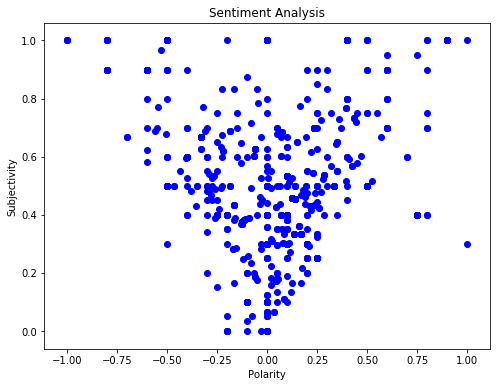

In [21]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

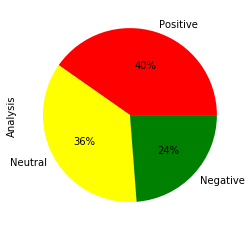

In [22]:
df.Analysis.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

In [23]:
featur=['Tweets' ]
f=df[featur]
featur=['Analysis' ]
l=df[featur]

## Using TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english')
fff= tfidf.fit_transform(f.Tweets)

## Splitting the dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(fff, l, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1275, 1000)

In [27]:
X_test.shape

(319, 1000)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Logistic Regression

In [29]:
model = LogisticRegression()
model.fit(X_train, y_train)
accu=(accuracy_score(y_test, model.predict(X_test))*100)
print(accu)
# print ((accuracy_score(y_test, model.predict(X_test))*100))

82.13166144200626


C:\Users\MY PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\MY PC\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MY PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",accuracy_score(y_test, predicted)*100)

MultinomialNB Accuracy: 78.36990595611285


## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

C:\Users\MY PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
predictions = text_classifier.predict(X_test)
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions)*100)

84.63949843260188


## Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm = confusion_matrix(y_test, predictions)

In [34]:
print('Confusion Matrix :')
print(cm)
print('Accuracy Score :',accuracy_score(y_test, model.predict(X_test))*100)
print('Report : ')
print(classification_report(y_test, predictions)) 

Confusion Matrix :
[[ 54  17   2]
 [  1 123   1]
 [  0  28  93]]
Accuracy Score : 82.13166144200626
Report : 
              precision    recall  f1-score   support

    Negative       0.98      0.74      0.84        73
     Neutral       0.73      0.98      0.84       125
    Positive       0.97      0.77      0.86       121

    accuracy                           0.85       319
   macro avg       0.89      0.83      0.85       319
weighted avg       0.88      0.85      0.85       319



## Pridiction on Sentiment Analysis

In [35]:
ar=[]
data=input("Enter the review - ")
ar.append(str(data))
f=Tokeniz(str(ar))
ff=regex(f)
fff=stopwords(ff)
ffff=lemmatization(fff)
arr=[]
arr.append(ffff)
av= tfidf.transform(ar)
pr=model.predict(av)
print(pr)

Enter the review - i love the trip very much
['Positive']
